Correlation Table and Heatmaps
=================================

The correlation between the features considered in this work and the median score and normalized rank is calculated. The aim is to understand the effect these features have on a strategy's performance.

In this notebook, you will find the code for calculating and visualizing the correlation of features for the main paper and the Supplementary Information analysis.

**Imports**

In [1]:
import pandas as pd

In [2]:
import matplotlib

import matplotlib.pyplot as plt

# font = {"size": 15, "weight": "bold"}
# matplotlib.rc("font", **font)

In [3]:
import seaborn as sns

In [4]:
import imp

plot = imp.load_source('plot', '../src/plot.py')

/var/folders/19/1t7slkb13h578dr5bl_47kf80000gp/T/ipykernel_7155/1970887634.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [5]:
clustering_on = ["Normalized_Rank", "Median_score"]

# Heatmaps

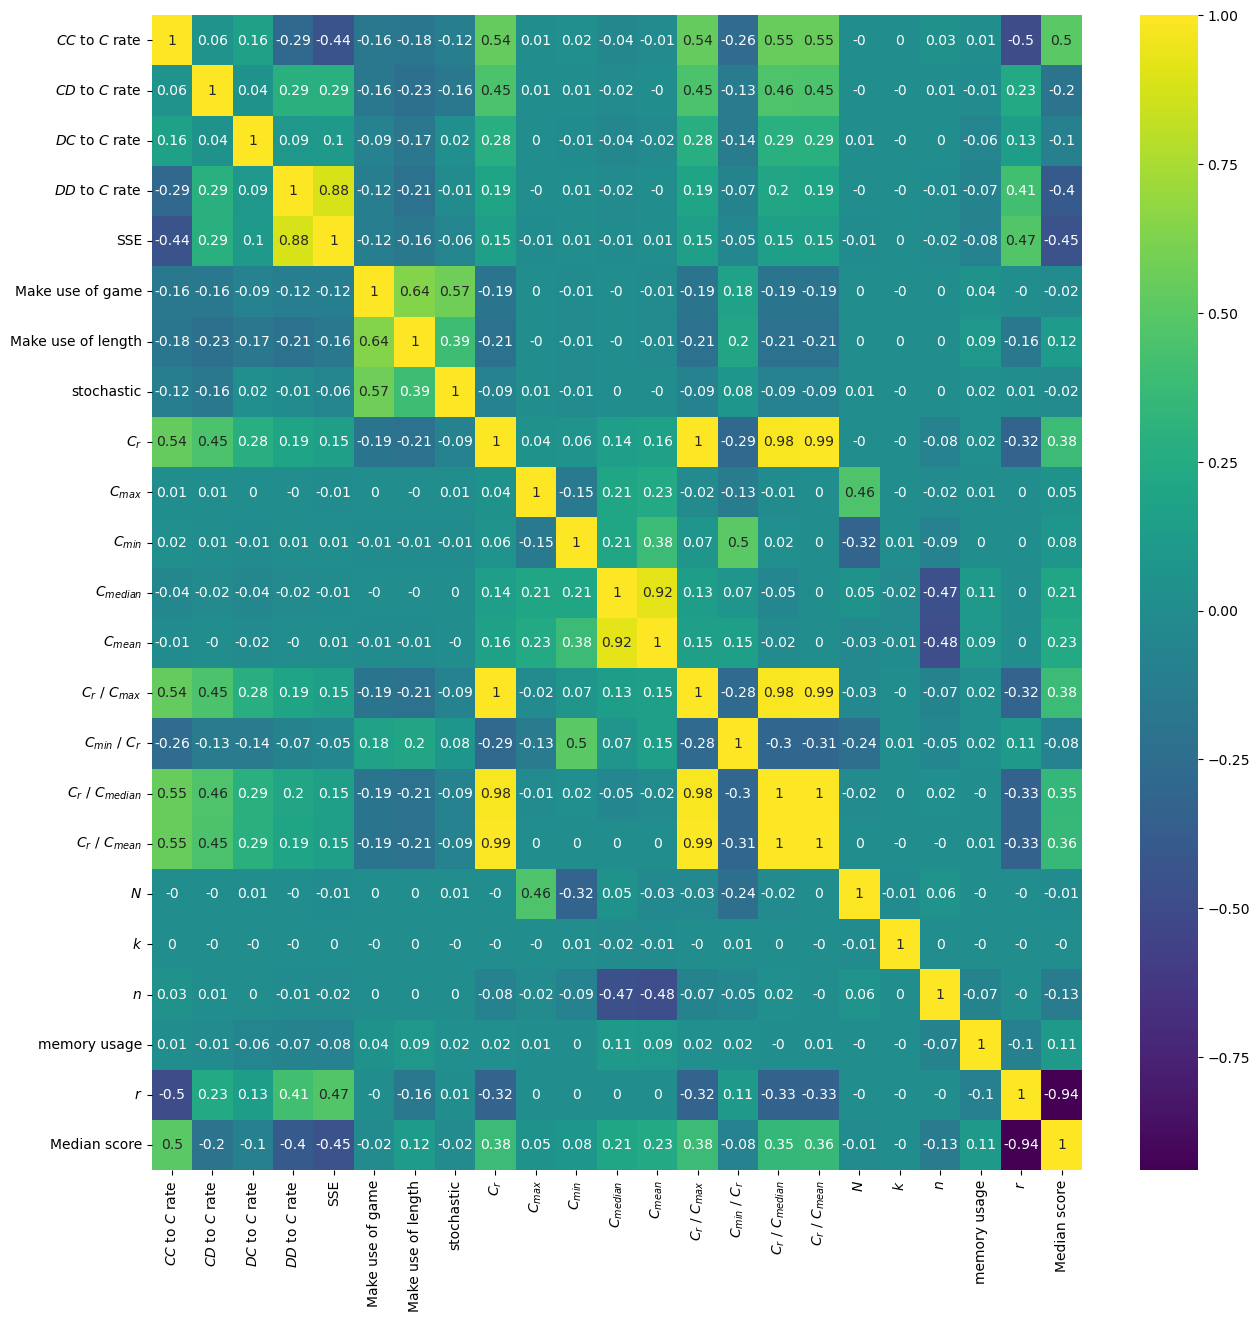

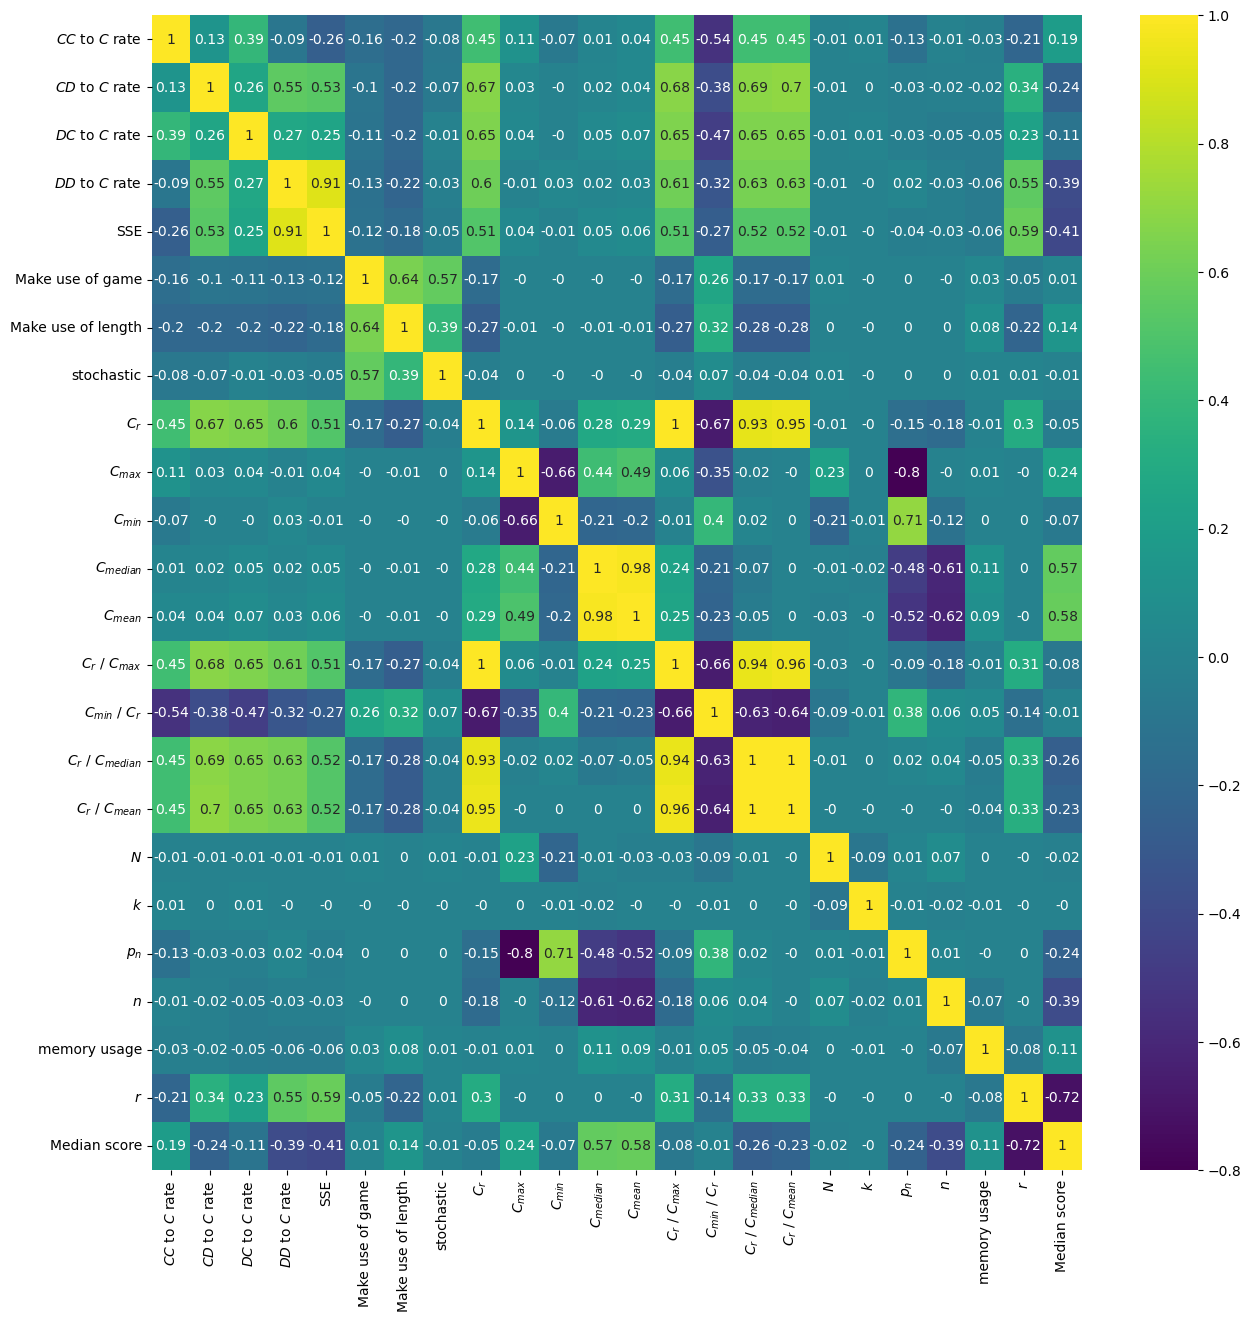

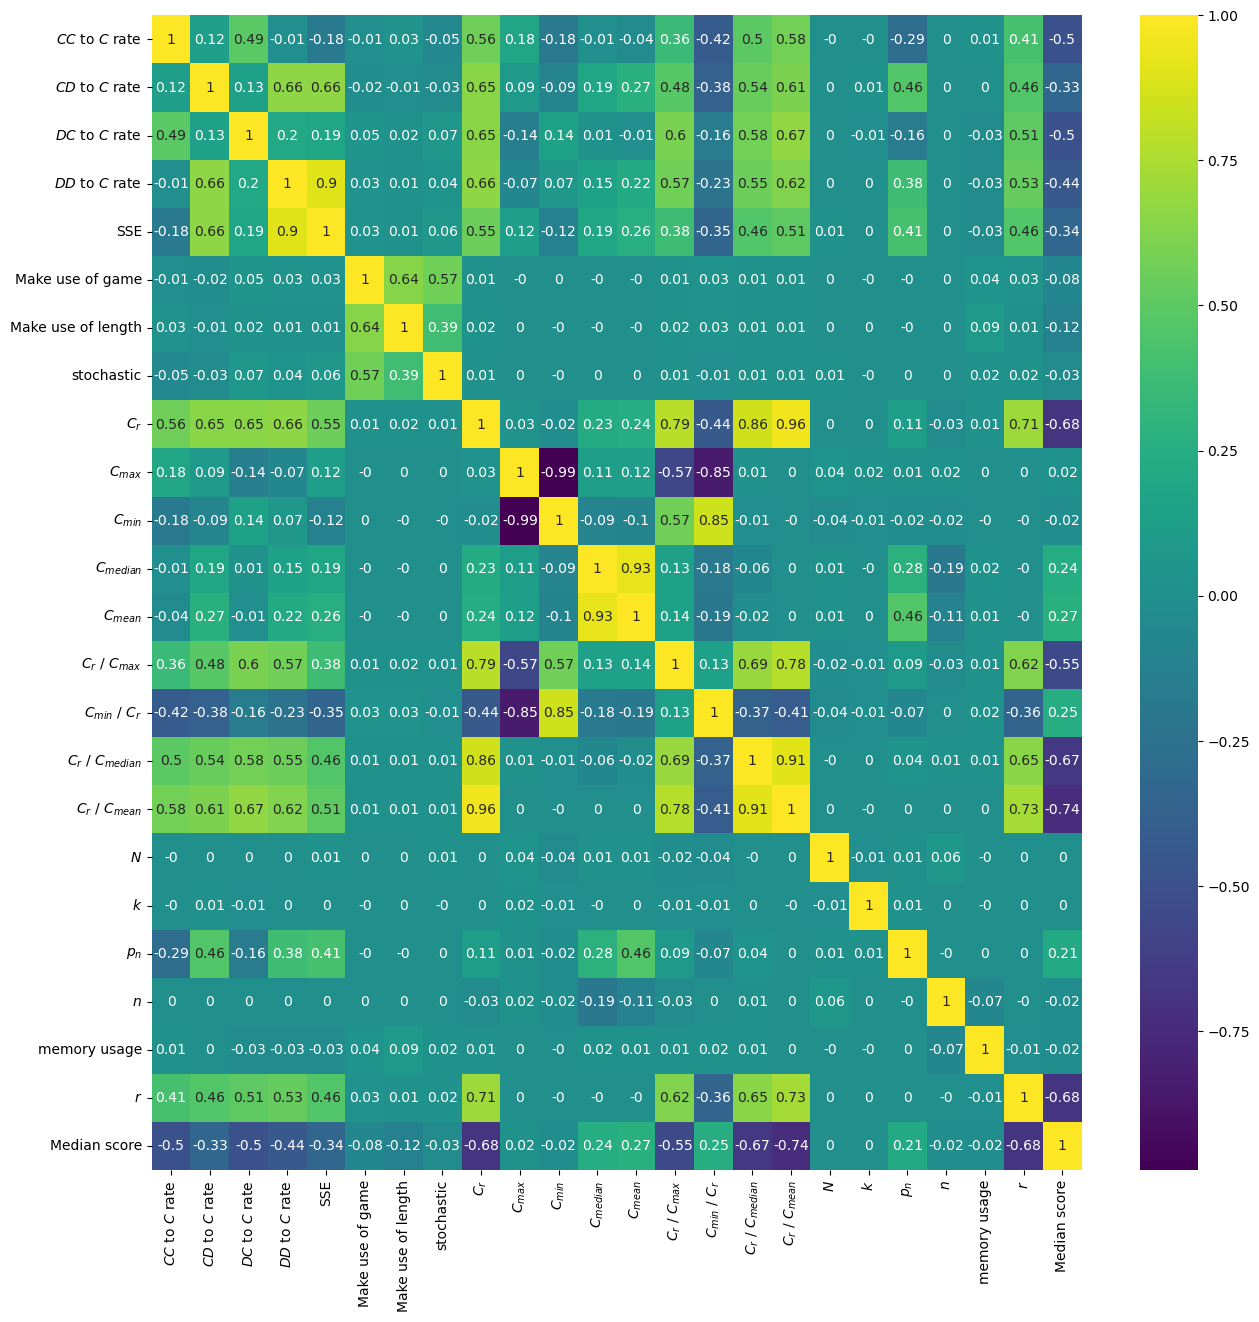

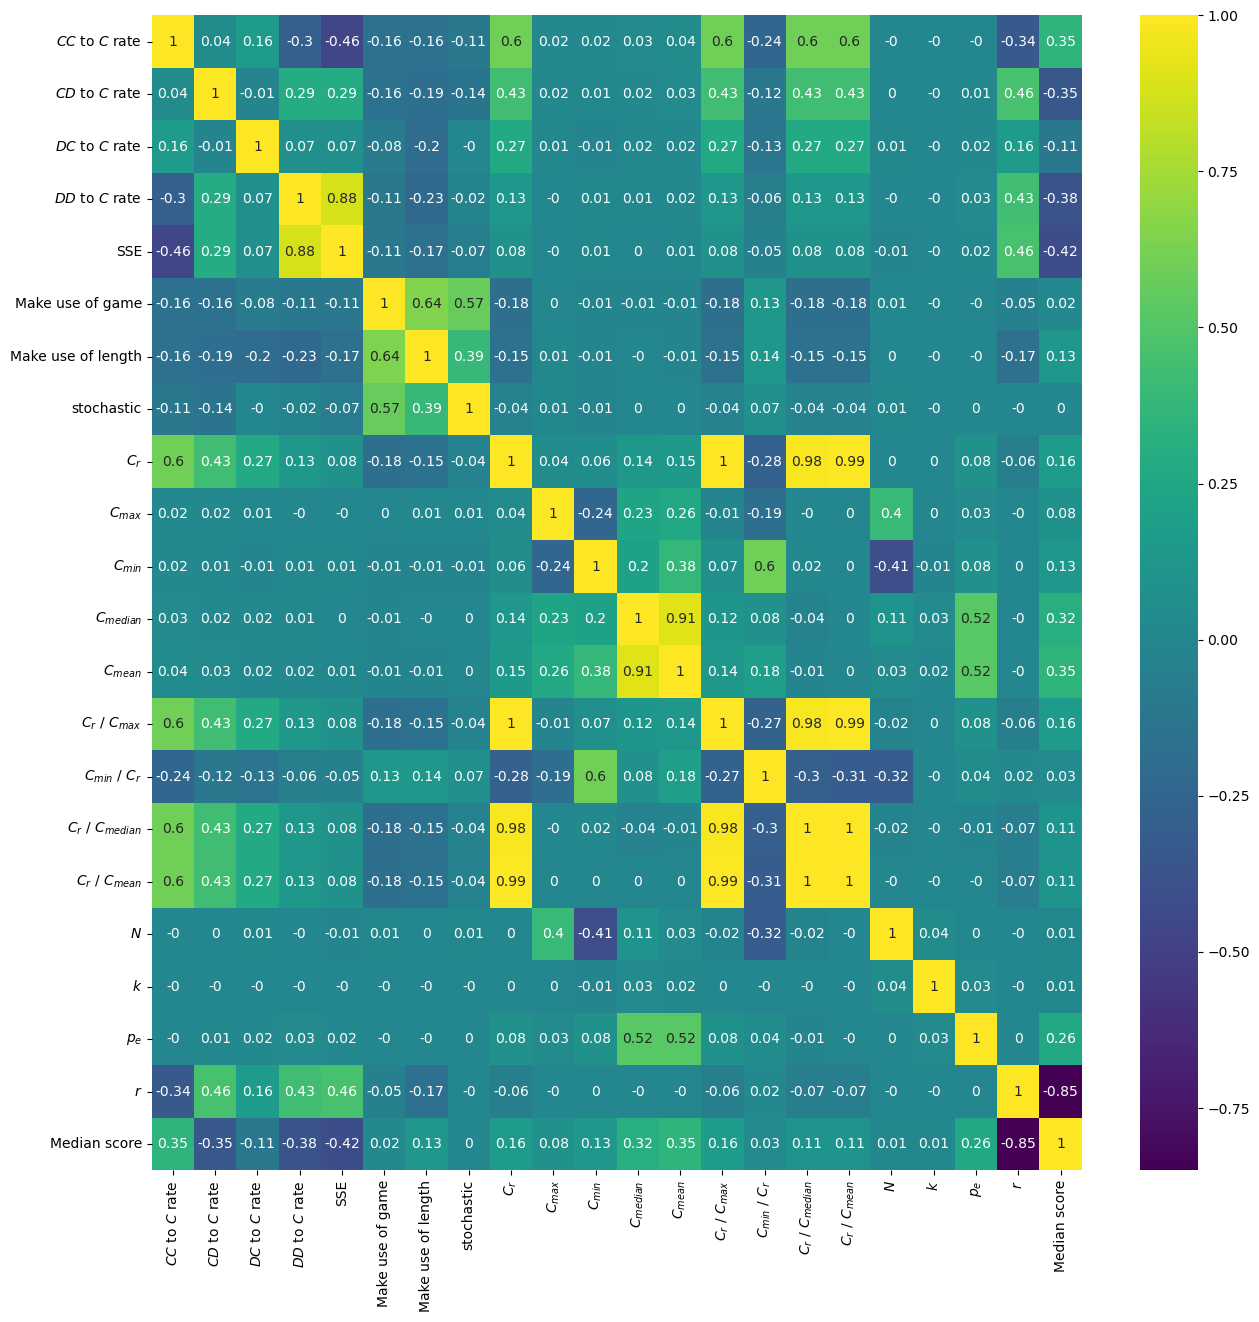

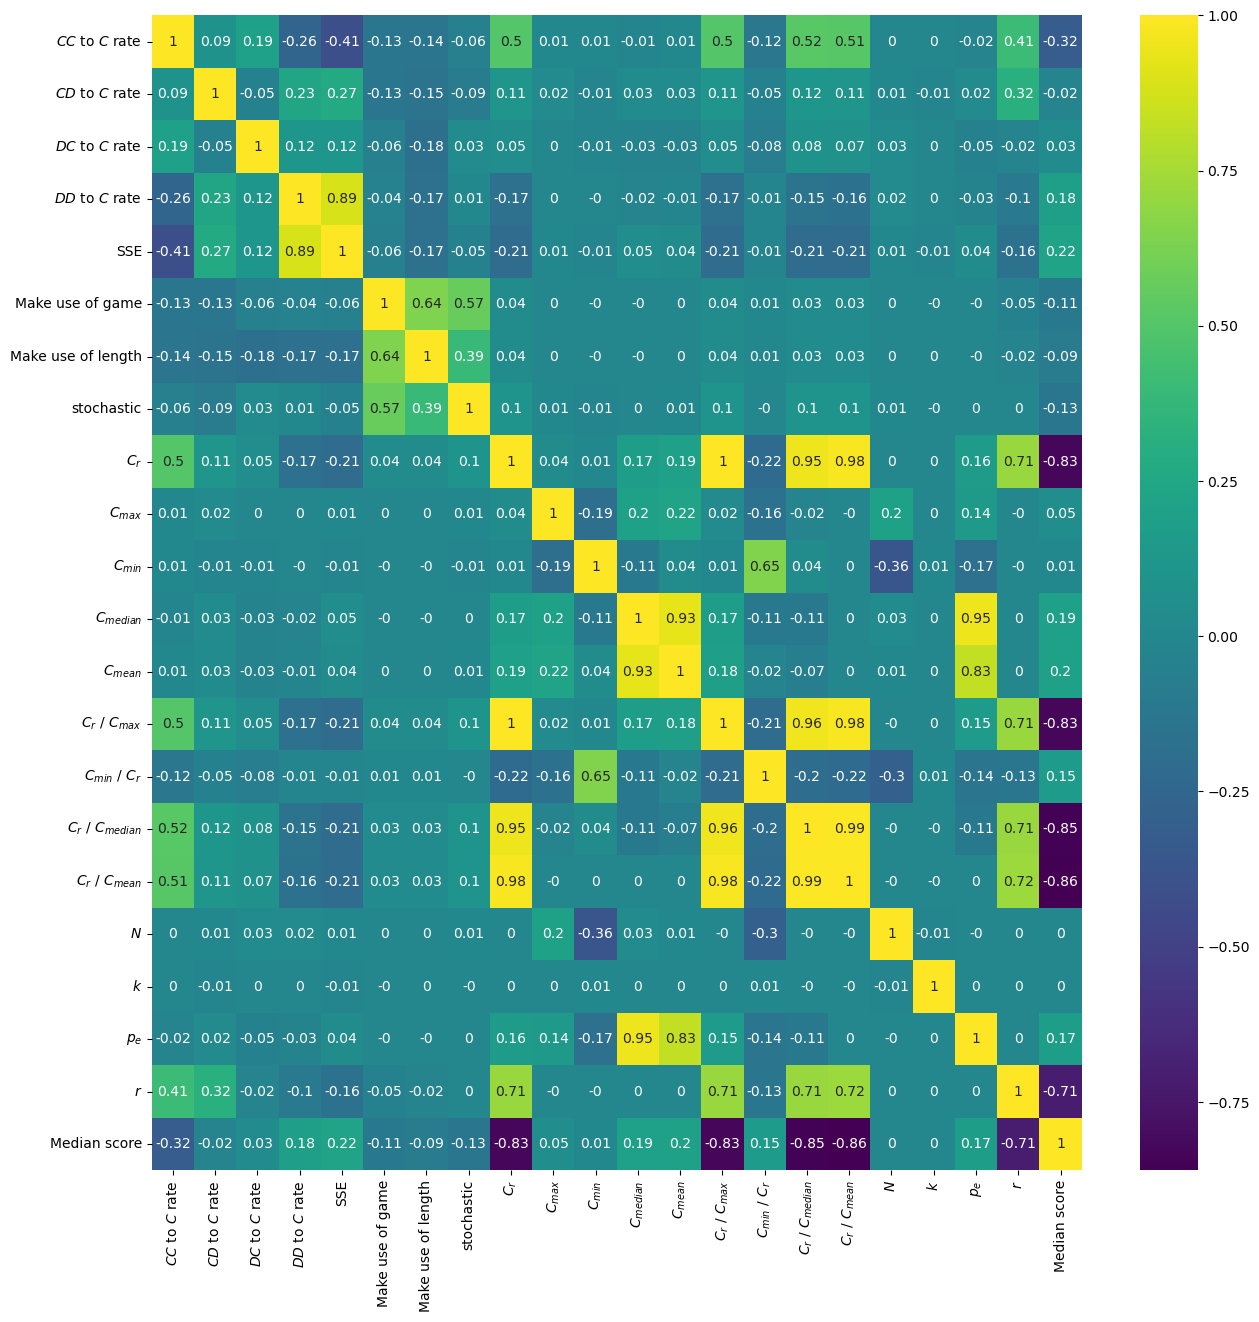

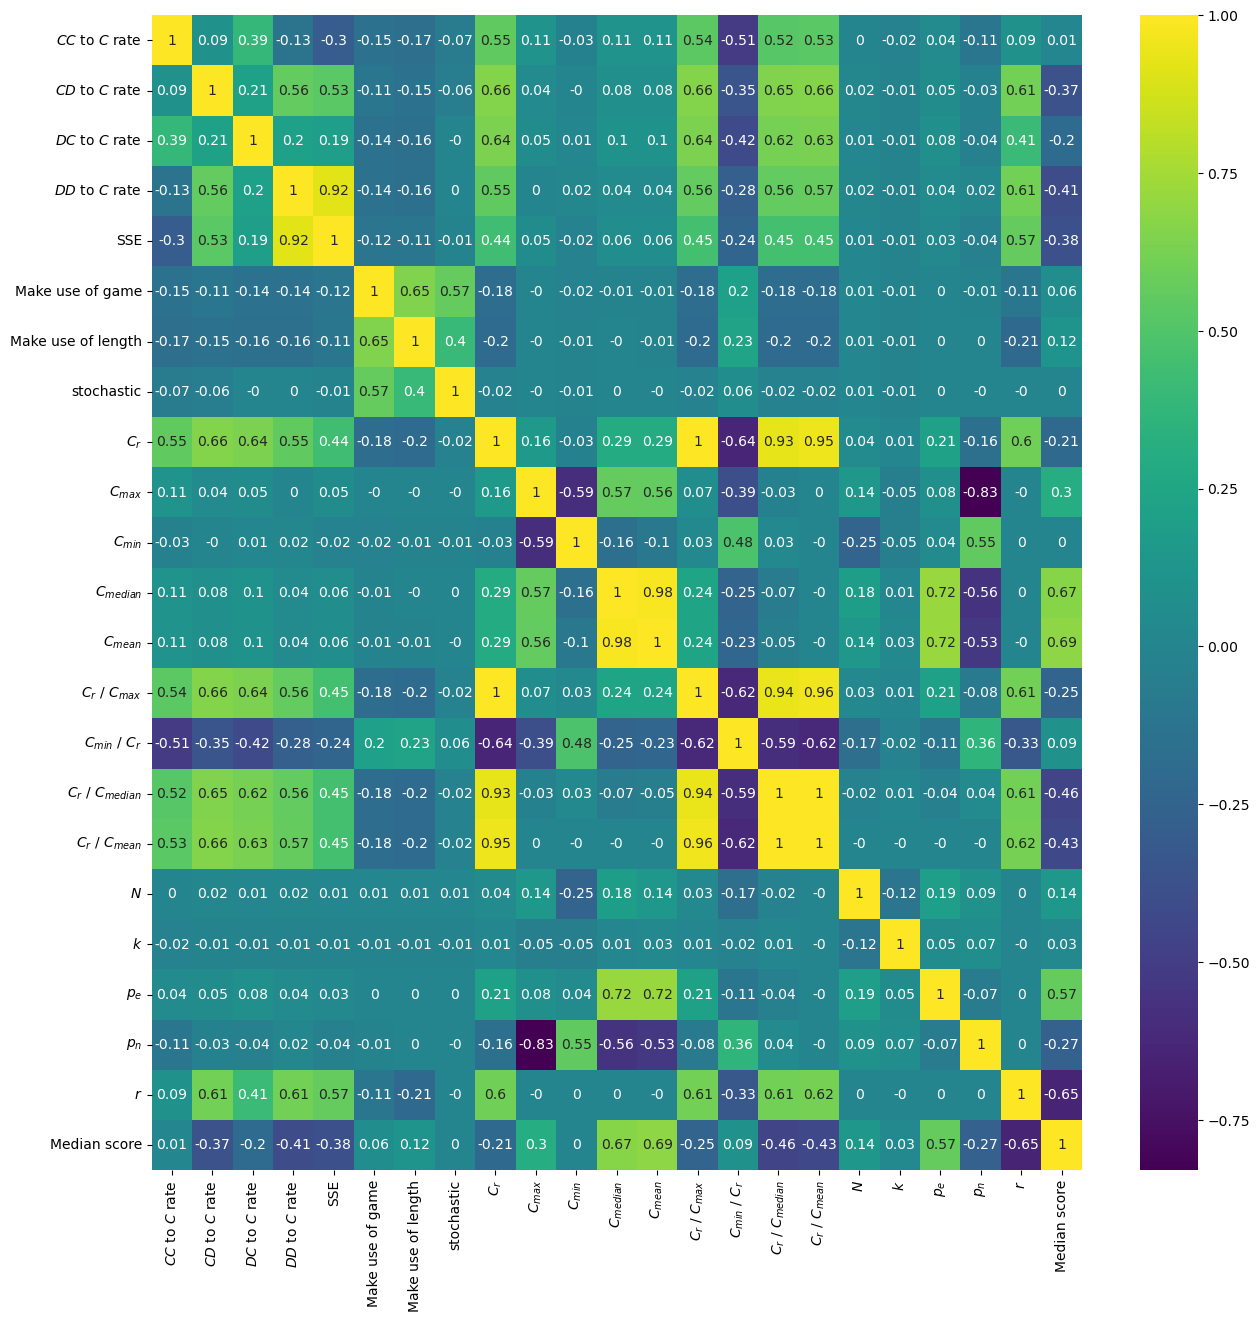

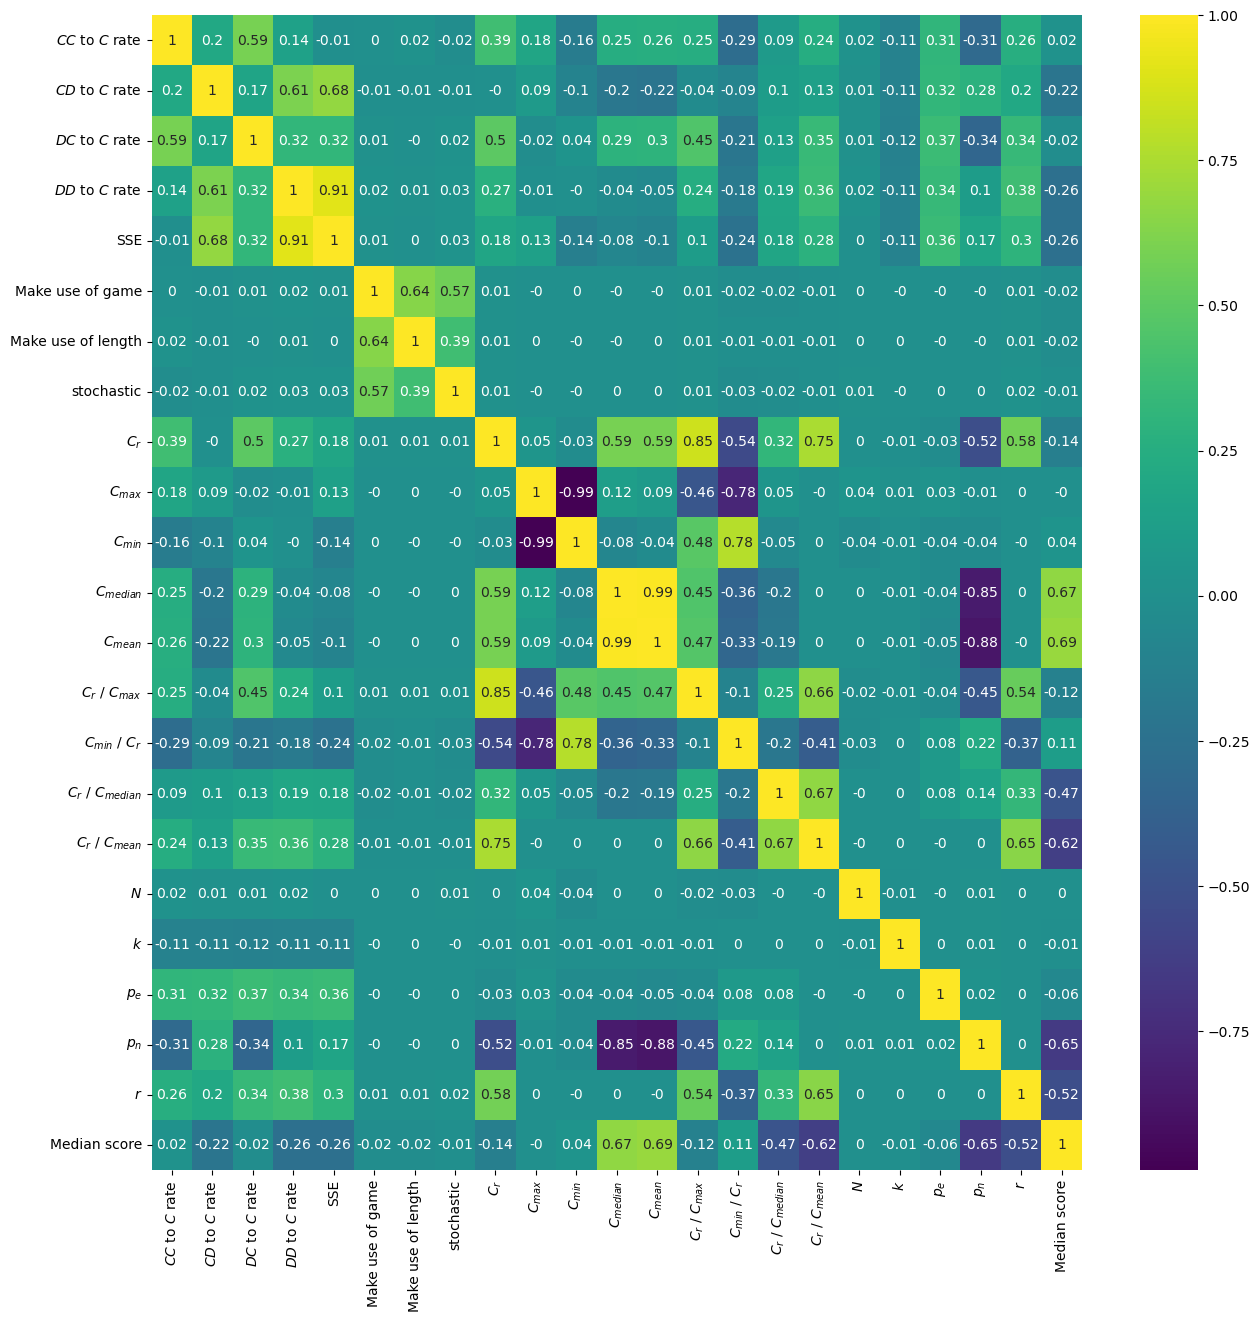

In [13]:
for file in ['standard', 'subset_noise', 'noise', 'subset_probend',  'probend',
             'subset_probend_noise', 'probend_noise']:
    df = pd.read_csv(f'../data/{file}_processed.csv')
    
    features = [
        "CC_to_C_rate",
        "CD_to_C_rate",
        "DC_to_C_rate",
        "DD_to_C_rate",
        "SSE",
        "Makes_use_of_game",
        "Makes_use_of_length",
        "Stochastic",
        "Cooperation_rating",
        "Cooperation_rating_max",
        "Cooperation_rating_min",
        "Cooperation_rating_median",
        "Cooperation_rating_mean",
        "Cooperation_rating_comp_to_max",
        "Cooperation_rating_comp_to_min",
        "Cooperation_rating_comp_to_median",
        "Cooperation_rating_comp_to_mean",
        "size",
        "repetitions"
    ]
    
    if file == "standard":
        features += ["turns", "memory_usage"]
    if file in ["noise", "subset_noise"]:
        features += ["noise", "turns", "memory_usage"]
    if file in ["probend", 'subset_probend']:
        features += ["probend"]
    if file in ["probend_noise", "subset_probend_noise"]:
        features += ["probend", "noise"]
    
    corr_data = df[features + clustering_on]
    corrmat = corr_data.corr()
    top_corr_features = corrmat.index
    
    data = corr_data[top_corr_features].corr().round(2)
    data.columns = [plot.features_labels[feature] for feature in data.columns]
    data.index = [plot.features_labels[feature] for feature in corr_data.corr().index]
    
    plt.figure(figsize=(15, 15))

    sns.heatmap(data,
                annot=True,
                cmap="viridis",);
    

    plt.savefig(
        f"../images/{file}_correlation_plot.pdf", bbox_inches="tight"
    )

# Correlation tables

 between feautures median score and normalised rank.

In [15]:
tables = []
for file in ['standard', 'subset_noise', 'subset_probend', 'subset_probend_noise']:
    df = pd.read_csv(f'../data/{file}_processed.csv')
    
    features = [
        "CC_to_C_rate",
        "CD_to_C_rate",
        "DC_to_C_rate",
        "DD_to_C_rate",
        "SSE",
        "Makes_use_of_game",
        "Makes_use_of_length",
        "Stochastic",
        "Cooperation_rating",
        "Cooperation_rating_max",
        "Cooperation_rating_min",
        "Cooperation_rating_median",
        "Cooperation_rating_mean",
        "Cooperation_rating_comp_to_max",
        "Cooperation_rating_comp_to_min",
        "Cooperation_rating_comp_to_median",
        "Cooperation_rating_comp_to_mean",
        "size",
        "repetitions"
    ]
    if file == "standard":
        features += ["turns", "memory_usage"]
    if file == "subset_noise":
        features += ["noise", "turns", "memory_usage"]
    if file == "subset_probend":
        features += ["probend"]
    if file == "subset_probend_noise":
        features += ["probend", "noise"]
    
    corr_data = df[features + clustering_on].corr()
    table = corr_data[clustering_on].iloc[:-2].round(3)
    table.index = [plot.features_labels[index] for index in table.index]
    tables.append(table)

In [16]:
merged_table = pd.concat(tables, axis=1)

In [18]:
merged_table.head()

,Normalized_Rank,Median_score,Normalized_Rank,Median_score,Normalized_Rank,Median_score,Normalized_Rank,Median_score
$CC$ to $C$ rate,-0.501,0.501,-0.210,0.194,-0.336,0.348,0.087,0.015
$CD$ to $C$ rate,0.226,-0.199,0.337,-0.235,0.458,-0.352,0.609,-0.372
$DC$ to $C$ rate,0.127,-0.100,0.227,-0.111,0.164,-0.105,0.410,-0.203
$DD$ to $C$ rate,0.412,-0.396,0.549,-0.391,0.433,-0.378,0.615,-0.407
SSE,0.473,-0.452,0.589,-0.412,0.458,-0.418,0.571,-0.383


In [19]:
tables = []
for file in ['standard', 'noise', 'probend', 'probend_noise']:
    df = pd.read_csv(f'../data/{file}_processed.csv')
    
    features = [
        "CC_to_C_rate",
        "CD_to_C_rate",
        "DC_to_C_rate",
        "DD_to_C_rate",
        "SSE",
        "Makes_use_of_game",
        "Makes_use_of_length",
        "Stochastic",
        "Cooperation_rating",
        "Cooperation_rating_max",
        "Cooperation_rating_min",
        "Cooperation_rating_median",
        "Cooperation_rating_mean",
        "Cooperation_rating_comp_to_max",
        "Cooperation_rating_comp_to_min",
        "Cooperation_rating_comp_to_median",
        "Cooperation_rating_comp_to_mean",
        "size",
        "repetitions"
    ]
    if file == "standard":
        features += ["turns", "memory_usage"]
    if file == "noise":
        features += ["noise", "turns", "memory_usage"]
    if file == "probend":
        features += ["probend"]
    if file == "probend_noise":
        features += ["probend", "noise"]
    
    corr_data = df[features + clustering_on].corr()
    table = corr_data[clustering_on].iloc[:-2].round(3)
    table.index = [plot.features_labels[index] for index in table.index]
    tables.append(table)

In [20]:
merged_full_table = pd.concat(tables, axis=1)

In [21]:
merged_full_table.head()

,Normalized_Rank,Median_score,Normalized_Rank,Median_score,Normalized_Rank,Median_score,Normalized_Rank,Median_score
$CC$ to $C$ rate,-0.501,0.501,0.413,-0.504,0.408,-0.323,0.260,0.023
$CD$ to $C$ rate,0.226,-0.199,0.457,-0.331,0.320,-0.017,0.205,-0.220
$DC$ to $C$ rate,0.127,-0.100,0.509,-0.504,-0.018,0.033,0.341,-0.016
$DD$ to $C$ rate,0.412,-0.396,0.533,-0.436,-0.103,0.176,0.378,-0.263
SSE,0.473,-0.452,0.463,-0.337,-0.157,0.224,0.305,-0.259


# Writing to File

In [22]:
order = ['$CC$ to $C$ rate', '$CD$ to $C$ rate', '$DC$ to $C$ rate', '$DD$ to $C$ rate', 
 '$C_r$', '$C_{max}$', '$C_{min}$', '$C_{median}$', '$C_{mean}$',
 '$C_r$ / $C_{max}$ ', '$C_{min}$ / $C_r$', '$C_r$ / $C_{median}$',
 '$C_r$ / $C_{mean}$', '$N$', '$k$', '$n$', '$p_n$', '$p_e$',
 'Make use of game', 'Make use of length', 'SSE', 'stochastic',
 'memory usage', ]

In [23]:
merged_table = merged_table.reindex(order)
merged_full_table = merged_full_table.reindex(order)

In [24]:
latex_table = merged_table.round(3).style.to_latex().replace('\$', '$').replace('\_', '_').replace('\{', '{').replace('\}', '}')

In [25]:
latex_table = latex_table.replace("nan", "-")

In [26]:
textfile = open('../paper/correlation_table_result.tex', 'w')
textfile.write(latex_table)
textfile.close()

In [27]:
latex_table = merged_full_table.round(3).style.to_latex().replace('\$', '$').replace('\_', '_').replace('\{', '{').replace('\}', '}')

In [28]:
latex_table = latex_table.replace("nan", "-")

In [29]:
textfile = open('../paper/correlation_table_result_full_dataset.tex', 'w')
textfile.write(latex_table)
textfile.close()